<a href="https://colab.research.google.com/github/srivatsan88/End-to-End-Time-Series/blob/master/Anomaly_Detection_using_Isolation_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

from sklearn.ensemble import IsolationForest

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv')

In [ ]:
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.4+ KB


In [ ]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


In [ ]:
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [ ]:
df=df.set_index('timestamp').resample("H").mean().reset_index()

In [ ]:
df

,timestamp,value
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [ ]:
df['hour']=df.timestamp.dt.hour

In [ ]:
df['weekday']=pd.Categorical(df.timestamp.dt.strftime('%A'), categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  5160 non-null   datetime64[ns]
 1   value      5160 non-null   float64       
 2   hour       5160 non-null   int64         
 3   weekday    5160 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 126.5 KB


In [ ]:
df

,timestamp,value,hour,weekday
0,2014-07-01 00:00:00,9485.5,0,Tuesday
1,2014-07-01 01:00:00,5433.0,1,Tuesday
2,2014-07-01 02:00:00,3346.5,2,Tuesday
3,2014-07-01 03:00:00,2216.5,3,Tuesday
4,2014-07-01 04:00:00,2189.5,4,Tuesday
...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday
5156,2015-01-31 20:00:00,24138.0,20,Saturday
5157,2015-01-31 21:00:00,24194.5,21,Saturday
5158,2015-01-31 22:00:00,26515.0,22,Saturday


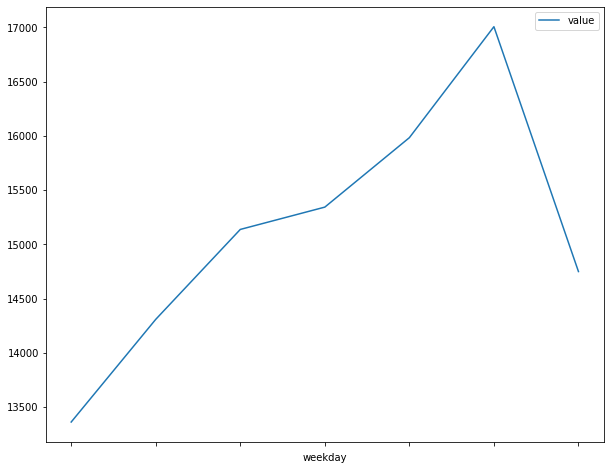

In [ ]:
df[['value','weekday']].groupby('weekday').mean().plot()

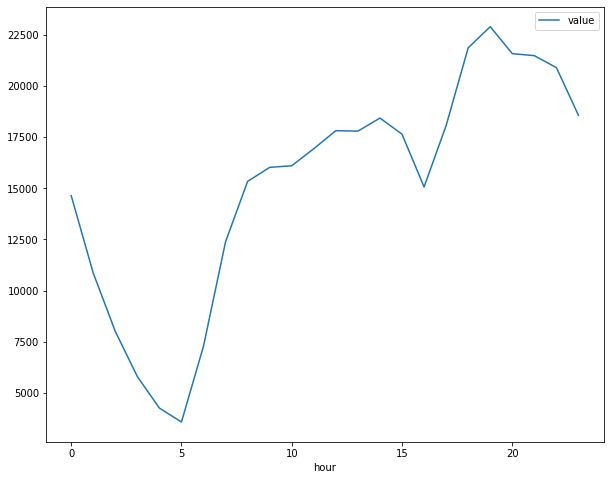

In [ ]:
df[['value','hour']].groupby('hour').mean().plot()

In [ ]:
fig = px.line(df.reset_index(), x='timestamp', y='value', title='NYC Taxi Demand')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

Anomalous Point

```
NYC Marathon - 2014-11-02
Thanksgiving - 2014-11-27
Christmas - 2014-12-25
New Years - 2015-01-01
Snow Blizzard - 2015-01-26 and 2015-01-27```



In [ ]:
model =  IsolationForest(contamination=0.004)
model.fit(df[['value']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.004,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [ ]:
df['outliers']=pd.Series(model.predict(df[['value']])).apply(lambda x: 'yes' if (x == -1) else 'no' )

In [ ]:
df.query('outliers=="yes"')

,timestamp,value,hour,weekday,outliers
1631,2014-09-06 23:00:00,29418.5,23,Saturday,yes
2135,2014-09-27 23:00:00,28024.5,23,Saturday,yes
2639,2014-10-18 23:00:00,28253.5,23,Saturday,yes
2971,2014-11-01 19:00:00,27912.0,19,Saturday,yes
2977,2014-11-02 01:00:00,37204.5,1,Sunday,yes
3143,2014-11-08 23:00:00,27926.0,23,Saturday,yes
3311,2014-11-15 23:00:00,27713.0,23,Saturday,yes
3479,2014-11-22 23:00:00,28299.0,23,Saturday,yes
4417,2015-01-01 01:00:00,29292.0,1,Thursday,yes
4655,2015-01-10 23:00:00,28351.0,23,Saturday,yes


In [ ]:
df

,timestamp,value,hour,weekday,outliers
0,2014-07-01 00:00:00,9485.5,0,Tuesday,no
1,2014-07-01 01:00:00,5433.0,1,Tuesday,no
2,2014-07-01 02:00:00,3346.5,2,Tuesday,no
3,2014-07-01 03:00:00,2216.5,3,Tuesday,no
4,2014-07-01 04:00:00,2189.5,4,Tuesday,no
...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,yes
5156,2015-01-31 20:00:00,24138.0,20,Saturday,no
5157,2015-01-31 21:00:00,24194.5,21,Saturday,no
5158,2015-01-31 22:00:00,26515.0,22,Saturday,no


In [ ]:
fig = px.scatter(df.reset_index(), x='timestamp', y='value', color='outliers', hover_data=['weekday'], title='NYC Taxi Demand')

fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

In [ ]:
model =  IsolationForest()
model.fit(df[['value']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [ ]:
score=model.decision_function(df[['value']])

In [ ]:
score

array([-0.00988052, -0.05792931,  0.00304147, ..., -0.01569826,
       -0.11083899, -0.11105714])

(array([  3.,   7.,   2.,   0.,  13.,   5.,   5.,   0.,   2.,   3.,   5.,
          5.,   5.,   5.,   8.,  10.,  15.,   7.,  15.,  25.,  48.,   3.,
         18.,  26.,  23.,  49.,  85.,  73., 118., 148., 234., 180., 197.,
        174., 282., 232., 282., 346., 277., 152., 106.,  40., 134., 105.,
        290., 477., 285., 183., 115., 338.]),
 array([-0.23950554, -0.23305646, -0.22660739, -0.22015832, -0.21370924,
        -0.20726017, -0.2008111 , -0.19436202, -0.18791295, -0.18146387,
        -0.1750148 , -0.16856573, -0.16211665, -0.15566758, -0.1492185 ,
        -0.14276943, -0.13632036, -0.12987128, -0.12342221, -0.11697313,
        -0.11052406, -0.10407499, -0.09762591, -0.09117684, -0.08472777,
        -0.07827869, -0.07182962, -0.06538054, -0.05893147, -0.0524824 ,
        -0.04603332, -0.03958425, -0.03313517, -0.0266861 , -0.02023703,
        -0.01378795, -0.00733888, -0.00088981,  0.00555927,  0.01200834,
         0.01845742,  0.02490649,  0.03135556,  0.03780464,  0.04425371,
 

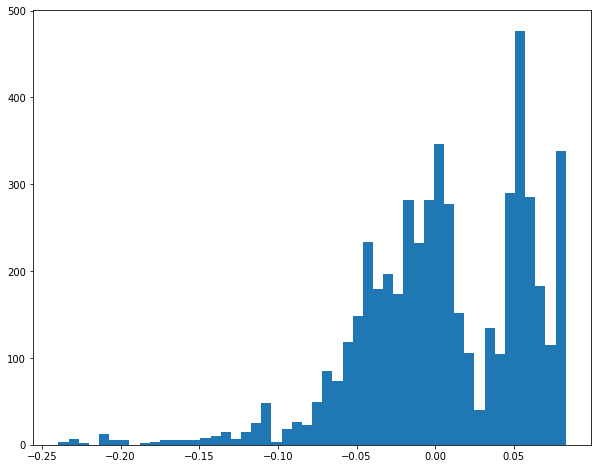

In [ ]:
plt.hist(score, bins=50)

In [ ]:
df['scores'] = score

In [ ]:
df

,timestamp,value,hour,weekday,outliers,scores
0,2014-07-01 00:00:00,9485.5,0,Tuesday,no,-0.009881
1,2014-07-01 01:00:00,5433.0,1,Tuesday,no,-0.057929
2,2014-07-01 02:00:00,3346.5,2,Tuesday,no,0.003041
3,2014-07-01 03:00:00,2216.5,3,Tuesday,no,-0.066890
4,2014-07-01 04:00:00,2189.5,4,Tuesday,no,-0.068618
...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,yes,-0.233030
5156,2015-01-31 20:00:00,24138.0,20,Saturday,no,-0.012900
5157,2015-01-31 21:00:00,24194.5,21,Saturday,no,-0.015698
5158,2015-01-31 22:00:00,26515.0,22,Saturday,no,-0.110839


In [ ]:
df.query('scores<-0.20')

,timestamp,value,hour,weekday,outliers,scores
1630,2014-09-06 22:00:00,27414.0,22,Saturday,no,-0.204555
1631,2014-09-06 23:00:00,29418.5,23,Saturday,yes,-0.238506
1775,2014-09-12 23:00:00,27331.5,23,Friday,no,-0.200348
1942,2014-09-19 22:00:00,27385.5,22,Friday,no,-0.204555
2135,2014-09-27 23:00:00,28024.5,23,Saturday,yes,-0.228477
2635,2014-10-18 19:00:00,27341.0,19,Saturday,no,-0.200348
2639,2014-10-18 23:00:00,28253.5,23,Saturday,yes,-0.231543
2807,2014-10-25 23:00:00,27554.5,23,Saturday,no,-0.209818
2971,2014-11-01 19:00:00,27912.0,19,Saturday,yes,-0.227000
2977,2014-11-02 01:00:00,37204.5,1,Sunday,yes,-0.239506
